# A Comparison of Predictive Dialer algorithms
## Rob Johnston

This python notebook was used to produce the graphs and charts shown in the main report. It is submitted for completeness to demonstrate my workings.

In [1]:
%run 'calling_list.py'

# Load in our call log results from a telemarketing campaign (the small refers to the length of calls -
# they are smaller than the market research calls)
cl = CallingList()
cl.load('small.csv')

## Summary statistics

In [2]:
total_calls = len(cl._df)

outcomes = cl._df.OutcomeCode.value_counts()/total_calls
print(outcomes)


talking_calls = cl._df[cl._df.OutcomeCode == 'TR']

talking_calls['Duration'] = (cl._df.OffsetDisconnect - cl._df.OffsetConnect) / 1000
talking_calls.boxplot('Duration')


talking_calls = talking_calls[talking_calls['Duration'] < 400]
talking_calls.hist('Duration', bins=20)





O     0.418463
TR    0.357067
AM    0.164953
E     0.028254
NU    0.020558
CF    0.006325
QD    0.002806
QT    0.001508
AC    0.000066
Name: OutcomeCode, dtype: float64


/Users/rob/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rob/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11495e550>]], dtype=object)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## Constant Dial Level & Free Agent (40 agents)

In [4]:
import pandas as pd

df_free_agent = pd.read_pickle('history/history_freeagent_40agent.pkl')

df_0_5_per_sec = pd.read_pickle('history/history_constant_40agent_0_5.pkl')
df_1_per_sec = pd.read_pickle('history/history_constant_40agent_1.pkl')
df_2_5_per_sec = pd.read_pickle('history/history_constant_40agent_2_5.pkl')
df_5_per_sec = pd.read_pickle('history/history_constant_40agent_5.pkl')
df_10_per_sec = pd.read_pickle('history/history_constant_40agent_10.pkl')

df_free_agent['current_time'] = df_free_agent['current_time'] / (1000 * 60)
df_0_5_per_sec['current_time'] = df_0_5_per_sec['current_time'] / (1000 * 60)
df_1_per_sec['current_time'] = df_1_per_sec['current_time'] / (1000 * 60)
df_2_5_per_sec['current_time'] = df_2_5_per_sec['current_time'] / (1000 * 60)
df_5_per_sec['current_time'] = df_5_per_sec['current_time'] / (1000 * 60)
df_10_per_sec['current_time'] = df_10_per_sec['current_time'] / (1000 * 60)

/Users/rob/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


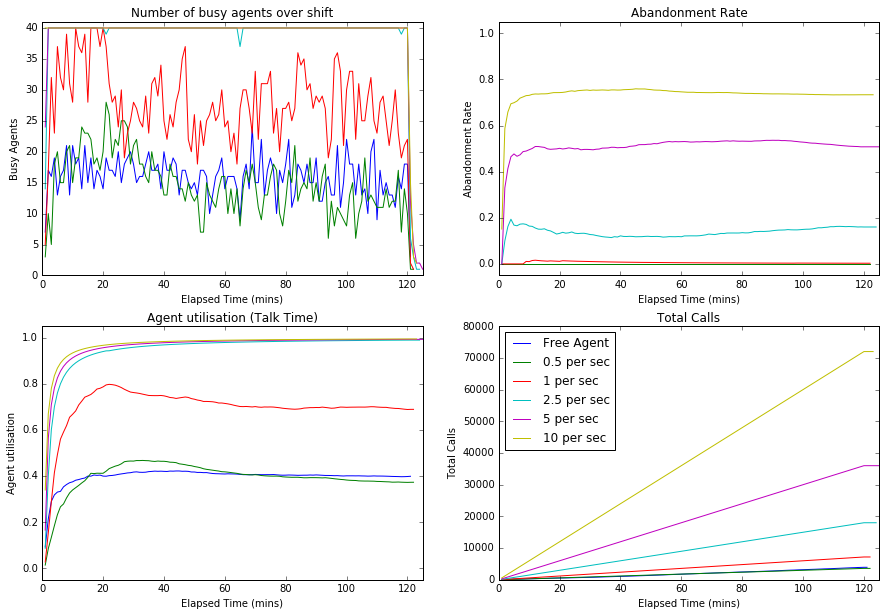

In [5]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

                          
axes[0,0].set_title('Number of busy agents over shift')
axes[0,0].set_xlabel("Elapsed Time (mins)")
axes[0,0].set_ylabel("Busy Agents")

axes[0,0].set_xlim([0, 125])
axes[0,0].set_ylim([0, 41])


axes[0,0].plot(df_free_agent.current_time, df_free_agent.number_busy_agents, lw=1, label='Free Agent')
axes[0,0].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.number_busy_agents, lw=1, label='0.5 per sec')
axes[0,0].plot(df_1_per_sec.current_time, df_1_per_sec.number_busy_agents, lw=1, label='1 per sec')
axes[0,0].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.number_busy_agents, lw=1, label='2.5 per sec')
axes[0,0].plot(df_5_per_sec.current_time, df_5_per_sec.number_busy_agents, lw=1, label='5 per sec')
axes[0,0].plot(df_10_per_sec.current_time, df_10_per_sec.number_busy_agents, lw=1, label='10 per sec')



axes[0,1].set_title('Abandonment Rate')
axes[0,1].set_xlabel("Elapsed Time (mins)")
axes[0,1].set_ylabel("Abandonment Rate")

axes[0,1].set_xlim([0, 125])
axes[0,1].set_ylim([-0.05, 1.05])


axes[0,1].plot(df_free_agent.current_time, df_free_agent.current_abandonment_rate, lw=1, label='Free Agent')
axes[0,1].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.current_abandonment_rate, lw=1, label='0.5 per sec')
axes[0,1].plot(df_1_per_sec.current_time, df_1_per_sec.current_abandonment_rate, lw=1, label='1 per sec')
axes[0,1].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.current_abandonment_rate, lw=1, label='2.5 per sec')
axes[0,1].plot(df_5_per_sec.current_time, df_5_per_sec.current_abandonment_rate, lw=1, label='5 per sec')
axes[0,1].plot(df_10_per_sec.current_time, df_10_per_sec.current_abandonment_rate, lw=1, label='10 per sec')


axes[1,0].set_title('Agent utilisation (Talk Time)')
axes[1,0].set_xlabel("Elapsed Time (mins)")
axes[1,0].set_ylabel("Agent utilisation")

axes[1,0].set_xlim([0, 125])
axes[1,0].set_ylim([-0.05, 1.05])


axes[1,0].plot(df_free_agent.current_time, df_free_agent.current_talk_time, lw=1, label='Free Agent')
axes[1,0].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.current_talk_time, lw=1, label='0.5 per sec')
axes[1,0].plot(df_1_per_sec.current_time, df_1_per_sec.current_talk_time, lw=1, label='1 per sec')
axes[1,0].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.current_talk_time, lw=1, label='2.5 per sec')
axes[1,0].plot(df_5_per_sec.current_time, df_5_per_sec.current_talk_time, lw=1, label='5 per sec')
axes[1,0].plot(df_10_per_sec.current_time, df_10_per_sec.current_talk_time, lw=1, label='10 per sec')


axes[1,1].set_title('Total Calls')
axes[1,1].set_xlabel("Elapsed Time (mins)")
axes[1,1].set_ylabel("Total Calls")

axes[1,1].set_xlim([0, 125])
#axes[1,1].set_ylim([-0.05, 1.05])


axes[1,1].plot(df_free_agent.current_time, df_free_agent.total_number_calls, lw=1, label='Free Agent')
axes[1,1].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.total_number_calls, lw=1, label='0.5 per sec')
axes[1,1].plot(df_1_per_sec.current_time, df_1_per_sec.total_number_calls, lw=1, label='1 per sec')
axes[1,1].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.total_number_calls, lw=1, label='2.5 per sec')
axes[1,1].plot(df_5_per_sec.current_time, df_5_per_sec.total_number_calls, lw=1, label='5 per sec')
axes[1,1].plot(df_10_per_sec.current_time, df_10_per_sec.total_number_calls, lw=1, label='10 per sec')
axes[1,1].legend(loc='upper left')
# fig.subplots_adjust(hspace=0)

fig.show()

## Constant Dial Level & Free Agent (20 agents)

In [7]:
import pandas as pd

df_free_agent = pd.read_pickle('history/history_freeagent_20agent.pkl')

df_0_5_per_sec = pd.read_pickle('history/history_constant_20agent_0_5.pkl')
df_1_per_sec = pd.read_pickle('history/history_constant_20agent_1.pkl')
df_2_5_per_sec = pd.read_pickle('history/history_constant_20agent_2_5.pkl')
df_5_per_sec = pd.read_pickle('history/history_constant_20agent_5.pkl')
df_10_per_sec = pd.read_pickle('history/history_constant_20agent_10.pkl')

df_free_agent['current_time'] = df_free_agent['current_time'] / (1000 * 60)
df_0_5_per_sec['current_time'] = df_0_5_per_sec['current_time'] / (1000 * 60)
df_1_per_sec['current_time'] = df_1_per_sec['current_time'] / (1000 * 60)
df_2_5_per_sec['current_time'] = df_2_5_per_sec['current_time'] / (1000 * 60)
df_5_per_sec['current_time'] = df_5_per_sec['current_time'] / (1000 * 60)
df_10_per_sec['current_time'] = df_10_per_sec['current_time'] / (1000 * 60)

/Users/rob/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


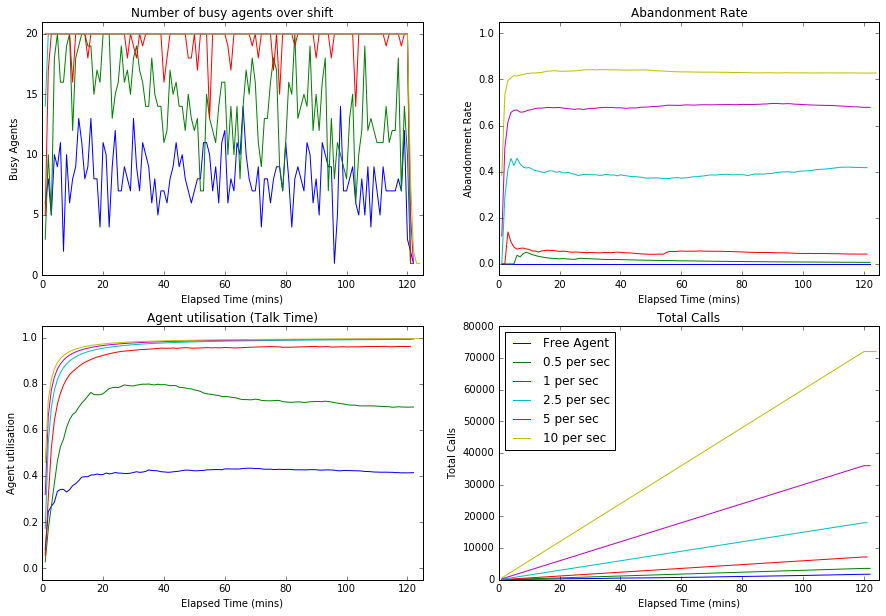

In [8]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

                          
axes[0,0].set_title('Number of busy agents over shift')
axes[0,0].set_xlabel("Elapsed Time (mins)")
axes[0,0].set_ylabel("Busy Agents")

axes[0,0].set_xlim([0, 125])
axes[0,0].set_ylim([0, 21])


axes[0,0].plot(df_free_agent.current_time, df_free_agent.number_busy_agents, lw=1, label='Free Agent')
axes[0,0].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.number_busy_agents, lw=1, label='0.5 per sec')
axes[0,0].plot(df_1_per_sec.current_time, df_1_per_sec.number_busy_agents, lw=1, label='1 per sec')
axes[0,0].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.number_busy_agents, lw=1, label='2.5 per sec')
axes[0,0].plot(df_5_per_sec.current_time, df_5_per_sec.number_busy_agents, lw=1, label='5 per sec')
axes[0,0].plot(df_10_per_sec.current_time, df_10_per_sec.number_busy_agents, lw=1, label='10 per sec')



axes[0,1].set_title('Abandonment Rate')
axes[0,1].set_xlabel("Elapsed Time (mins)")
axes[0,1].set_ylabel("Abandonment Rate")

axes[0,1].set_xlim([0, 125])
axes[0,1].set_ylim([-0.05, 1.05])


axes[0,1].plot(df_free_agent.current_time, df_free_agent.current_abandonment_rate, lw=1, label='Free Agent')
axes[0,1].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.current_abandonment_rate, lw=1, label='0.5 per sec')
axes[0,1].plot(df_1_per_sec.current_time, df_1_per_sec.current_abandonment_rate, lw=1, label='1 per sec')
axes[0,1].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.current_abandonment_rate, lw=1, label='2.5 per sec')
axes[0,1].plot(df_5_per_sec.current_time, df_5_per_sec.current_abandonment_rate, lw=1, label='5 per sec')
axes[0,1].plot(df_10_per_sec.current_time, df_10_per_sec.current_abandonment_rate, lw=1, label='10 per sec')


axes[1,0].set_title('Agent utilisation (Talk Time)')
axes[1,0].set_xlabel("Elapsed Time (mins)")
axes[1,0].set_ylabel("Agent utilisation")

axes[1,0].set_xlim([0, 125])
axes[1,0].set_ylim([-0.05, 1.05])


axes[1,0].plot(df_free_agent.current_time, df_free_agent.current_talk_time, lw=1, label='Free Agent')
axes[1,0].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.current_talk_time, lw=1, label='0.5 per sec')
axes[1,0].plot(df_1_per_sec.current_time, df_1_per_sec.current_talk_time, lw=1, label='1 per sec')
axes[1,0].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.current_talk_time, lw=1, label='2.5 per sec')
axes[1,0].plot(df_5_per_sec.current_time, df_5_per_sec.current_talk_time, lw=1, label='5 per sec')
axes[1,0].plot(df_10_per_sec.current_time, df_10_per_sec.current_talk_time, lw=1, label='10 per sec')


axes[1,1].set_title('Total Calls')
axes[1,1].set_xlabel("Elapsed Time (mins)")
axes[1,1].set_ylabel("Total Calls")

axes[1,1].set_xlim([0, 125])
#axes[1,1].set_ylim([-0.05, 1.05])


axes[1,1].plot(df_free_agent.current_time, df_free_agent.total_number_calls, lw=1, label='Free Agent')
axes[1,1].plot(df_0_5_per_sec.current_time, df_0_5_per_sec.total_number_calls, lw=1, label='0.5 per sec')
axes[1,1].plot(df_1_per_sec.current_time, df_1_per_sec.total_number_calls, lw=1, label='1 per sec')
axes[1,1].plot(df_2_5_per_sec.current_time, df_2_5_per_sec.total_number_calls, lw=1, label='2.5 per sec')
axes[1,1].plot(df_5_per_sec.current_time, df_5_per_sec.total_number_calls, lw=1, label='5 per sec')
axes[1,1].plot(df_10_per_sec.current_time, df_10_per_sec.total_number_calls, lw=1, label='10 per sec')
axes[1,1].legend(loc='upper left')
# fig.subplots_adjust(hspace=0)

fig.show()

## Genetic Algorithm - Interval 30 mins

In [9]:
import pandas as pd

df_genetic_40 = pd.read_pickle('history/history_genetic_40agents.pkl')
df_genetic_80 = pd.read_pickle('history/history_genetic_80agents.pkl')
df_genetic_20 = pd.read_pickle('history/history_genetic_20agents.pkl')

df_genetic_40['current_time'] = df_genetic_40['current_time'] / (1000 * 60)
df_genetic_80['current_time'] = df_genetic_80['current_time'] / (1000 * 60)
df_genetic_20['current_time'] = df_genetic_20['current_time'] / (1000 * 60)

/Users/rob/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


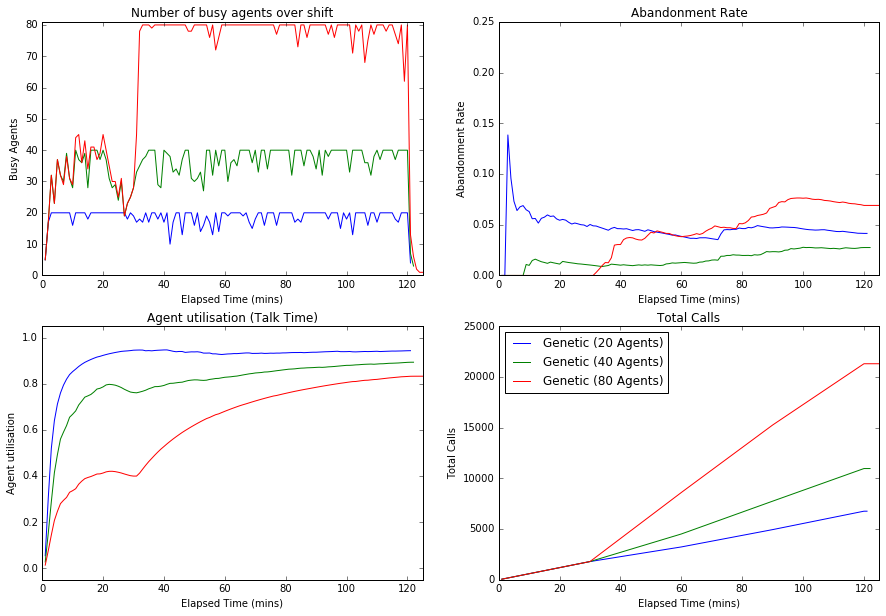

In [10]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

                          
axes[0,0].set_title('Number of busy agents over shift')
axes[0,0].set_xlabel("Elapsed Time (mins)")
axes[0,0].set_ylabel("Busy Agents")

axes[0,0].set_xlim([0, 125])
axes[0,0].set_ylim([0, 81])


axes[0,0].plot(df_genetic_20.current_time, df_genetic_20.number_busy_agents, lw=1, label='Genetic (20 Agents)')
axes[0,0].plot(df_genetic_40.current_time, df_genetic_40.number_busy_agents, lw=1, label='Genetic (40 agents)')
axes[0,0].plot(df_genetic_80.current_time, df_genetic_80.number_busy_agents, lw=1, label='Genetic (80 agents)')


axes[0,1].set_title('Abandonment Rate')
axes[0,1].set_xlabel("Elapsed Time (mins)")
axes[0,1].set_ylabel("Abandonment Rate")

axes[0,1].set_xlim([0, 125])
axes[0,1].set_ylim([0, 0.25])


axes[0,1].plot(df_genetic_20.current_time, df_genetic_20.current_abandonment_rate, lw=1, label='Genetic (20 Agents)')
axes[0,1].plot(df_genetic_40.current_time, df_genetic_40.current_abandonment_rate, lw=1, label='Genetic (40 Agents)')
axes[0,1].plot(df_genetic_80.current_time, df_genetic_80.current_abandonment_rate, lw=1, label='Genetic (80 Agents)')


axes[1,0].set_title('Agent utilisation (Talk Time)')
axes[1,0].set_xlabel("Elapsed Time (mins)")
axes[1,0].set_ylabel("Agent utilisation")

axes[1,0].set_xlim([0, 125])
axes[1,0].set_ylim([-0.05, 1.05])


axes[1,0].plot(df_genetic_20.current_time, df_genetic_20.current_talk_time, lw=1, label='Genetic (20 Agents)')
axes[1,0].plot(df_genetic_40.current_time, df_genetic_40.current_talk_time, lw=1, label='Genetic (40 Agents)')
axes[1,0].plot(df_genetic_80.current_time, df_genetic_80.current_talk_time, lw=1, label='Genetic (80 Agents)')


axes[1,1].set_title('Total Calls')
axes[1,1].set_xlabel("Elapsed Time (mins)")
axes[1,1].set_ylabel("Total Calls")

axes[1,1].set_xlim([0, 125])
#axes[1,1].set_ylim([-0.05, 1.05])


axes[1,1].plot(df_genetic_20.current_time, df_genetic_20.total_number_calls, lw=1, label='Genetic (20 Agents)')
axes[1,1].plot(df_genetic_40.current_time, df_genetic_40.total_number_calls, lw=1, label='Genetic (40 Agents)')
axes[1,1].plot(df_genetic_80.current_time, df_genetic_80.total_number_calls, lw=1, label='Genetic (80 Agents)')
axes[1,1].legend(loc='upper left')

# fig.subplots_adjust(hspace=0)

fig.show()

## Genetic Algorithm - Interval 15 mins

In [13]:
import pandas as pd

df_genetic_40_15 = pd.read_pickle('history/history_genetic_40agents_15min.pkl')
df_genetic_80_15 = pd.read_pickle('history/history_genetic_80agents_15min.pkl')
df_genetic_20_15 = pd.read_pickle('history/history_genetic_20agents_15min.pkl')

df_genetic_40_15['current_time'] = df_genetic_40_15['current_time'] / (1000 * 60)
df_genetic_80_15['current_time'] = df_genetic_80_15['current_time'] / (1000 * 60)
df_genetic_20_15['current_time'] = df_genetic_20_15['current_time'] / (1000 * 60)

/Users/rob/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


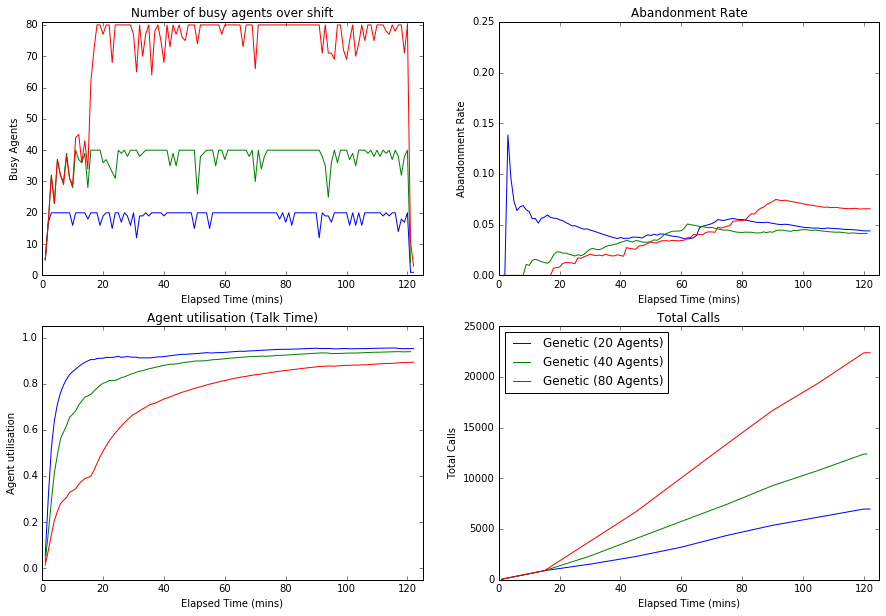

In [14]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

                          
axes[0,0].set_title('Number of busy agents over shift')
axes[0,0].set_xlabel("Elapsed Time (mins)")
axes[0,0].set_ylabel("Busy Agents")

axes[0,0].set_xlim([0, 125])
axes[0,0].set_ylim([0, 81])


axes[0,0].plot(df_genetic_20_15.current_time, df_genetic_20_15.number_busy_agents, lw=1, label='Genetic (20 Agents)')
axes[0,0].plot(df_genetic_40_15.current_time, df_genetic_40_15.number_busy_agents, lw=1, label='Genetic (40 agents)')
axes[0,0].plot(df_genetic_80_15.current_time, df_genetic_80_15.number_busy_agents, lw=1, label='Genetic (80 agents)')


axes[0,1].set_title('Abandonment Rate')
axes[0,1].set_xlabel("Elapsed Time (mins)")
axes[0,1].set_ylabel("Abandonment Rate")

axes[0,1].set_xlim([0, 125])
axes[0,1].set_ylim([0, 0.25])


axes[0,1].plot(df_genetic_20_15.current_time, df_genetic_20_15.current_abandonment_rate, lw=1, label='Genetic (20 Agents)')
axes[0,1].plot(df_genetic_40_15.current_time, df_genetic_40_15.current_abandonment_rate, lw=1, label='Genetic (40 Agents)')
axes[0,1].plot(df_genetic_80_15.current_time, df_genetic_80_15.current_abandonment_rate, lw=1, label='Genetic (80 Agents)')


axes[1,0].set_title('Agent utilisation (Talk Time)')
axes[1,0].set_xlabel("Elapsed Time (mins)")
axes[1,0].set_ylabel("Agent utilisation")

axes[1,0].set_xlim([0, 125])
axes[1,0].set_ylim([-0.05, 1.05])


axes[1,0].plot(df_genetic_20_15.current_time, df_genetic_20_15.current_talk_time, lw=1, label='Genetic (20 Agents)')
axes[1,0].plot(df_genetic_40_15.current_time, df_genetic_40_15.current_talk_time, lw=1, label='Genetic (40 Agents)')
axes[1,0].plot(df_genetic_80_15.current_time, df_genetic_80_15.current_talk_time, lw=1, label='Genetic (80 Agents)')


axes[1,1].set_title('Total Calls')
axes[1,1].set_xlabel("Elapsed Time (mins)")
axes[1,1].set_ylabel("Total Calls")

axes[1,1].set_xlim([0, 125])
#axes[1,1].set_ylim([-0.05, 1.05])


axes[1,1].plot(df_genetic_20_15.current_time, df_genetic_20_15.total_number_calls, lw=1, label='Genetic (20 Agents)')
axes[1,1].plot(df_genetic_40_15.current_time, df_genetic_40_15.total_number_calls, lw=1, label='Genetic (40 Agents)')
axes[1,1].plot(df_genetic_80_15.current_time, df_genetic_80_15.total_number_calls, lw=1, label='Genetic (80 Agents)')
axes[1,1].legend(loc='upper left')

# fig.subplots_adjust(hspace=0)

fig.show()